#####**DATA PREPROCESSING**
---



In [3]:
# Importing relevant libraries
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
# Importing the data
df = pd.read_csv('covid_19_india.csv')
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [5]:
def time_convert(x):
  date = x.split('/')
  date[0], date[1] = date[1], date[0]
  return '/'.join(date)
df['Date'] = df['Date'].apply(time_convert)
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,01/30/20,6:00 PM,Kerala,1,0,0,0,1
1,2,01/31/20,6:00 PM,Kerala,1,0,0,0,1
2,3,02/01/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,02/03/20,6:00 PM,Kerala,3,0,0,0,3


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [7]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
9286,9287,2020-12-09,8:00 AM,Telengana,-,-,266120,1480,275261
9287,9288,2020-12-09,8:00 AM,Tripura,-,-,32169,373,32945
9288,9289,2020-12-09,8:00 AM,Uttarakhand,-,-,72435,1307,79141
9289,9290,2020-12-09,8:00 AM,Uttar Pradesh,-,-,528832,7967,558173
9290,9291,2020-12-09,8:00 AM,West Bengal,-,-,475425,8820,507995


In [8]:
# Checking null values
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [9]:
# knowing about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291 entries, 0 to 9290
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       9291 non-null   int64         
 1   Date                      9291 non-null   datetime64[ns]
 2   Time                      9291 non-null   object        
 3   State/UnionTerritory      9291 non-null   object        
 4   ConfirmedIndianNational   9291 non-null   object        
 5   ConfirmedForeignNational  9291 non-null   object        
 6   Cured                     9291 non-null   int64         
 7   Deaths                    9291 non-null   int64         
 8   Confirmed                 9291 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 653.4+ KB


In [10]:
# describing the data
df.describe()

,Sno,Cured,Deaths,Confirmed
count,9291.000000,9.291000e+03,9291.000000,9.291000e+03
mean,4646.000000,7.863266e+04,1487.620385,9.183978e+04
std,2682.225009,1.931102e+05,4713.813690,2.166014e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,2323.500000,1.520000e+02,2.000000,5.385000e+02
50%,4646.000000,4.308000e+03,66.000000,6.832000e+03
75%,6968.500000,5.772650e+04,926.500000,7.885600e+04
max,9291.000000,1.737080e+06,47827.000000,1.859367e+06


In [11]:
# correlation matrix
df.corr()

,Sno,Cured,Deaths,Confirmed
Sno,1.000000,0.432994,0.290920,0.425833
Cured,0.432994,1.000000,0.893227,0.995012
Deaths,0.290920,0.893227,1.000000,0.913777
Confirmed,0.425833,0.995012,0.913777,1.000000


In [12]:
print(df['State/UnionTerritory'].unique())
print(len(df['State/UnionTerritory'].unique()))

['Kerala' 'Telengana' 'Delhi' 'Rajasthan' 'Uttar Pradesh' 'Haryana'
 'Ladakh' 'Tamil Nadu' 'Karnataka' 'Maharashtra' 'Punjab'
 'Jammu and Kashmir' 'Andhra Pradesh' 'Uttarakhand' 'Odisha' 'Puducherry'
 'West Bengal' 'Chhattisgarh' 'Chandigarh' 'Gujarat' 'Himachal Pradesh'
 'Madhya Pradesh' 'Bihar' 'Manipur' 'Mizoram'
 'Andaman and Nicobar Islands' 'Goa' 'Unassigned' 'Assam' 'Jharkhand'
 'Arunachal Pradesh' 'Tripura' 'Nagaland' 'Meghalaya' 'Dadar Nagar Haveli'
 'Cases being reassigned to states' 'Sikkim' 'Daman & Diu'
 'Dadra and Nagar Haveli and Daman and Diu' 'Telangana' 'Telangana***'
 'Telengana***' 'Maharashtra***' 'Chandigarh***' 'Punjab***']
45


In [13]:
# dropping stars from the state names
def drop_star(df):
  for i in df['State/UnionTerritory'].iteritems():
    if i[1][-3:] == "***":
      df.drop(i[0], inplace=True)

drop_star(df)
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana'],
      dtype=object)

#### **Data Visualization**

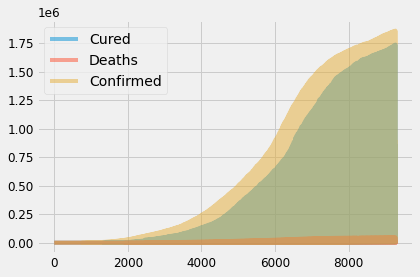

In [14]:
df[['Cured', 'Deaths', 'Confirmed']].plot(alpha=0.5)
plt.show()

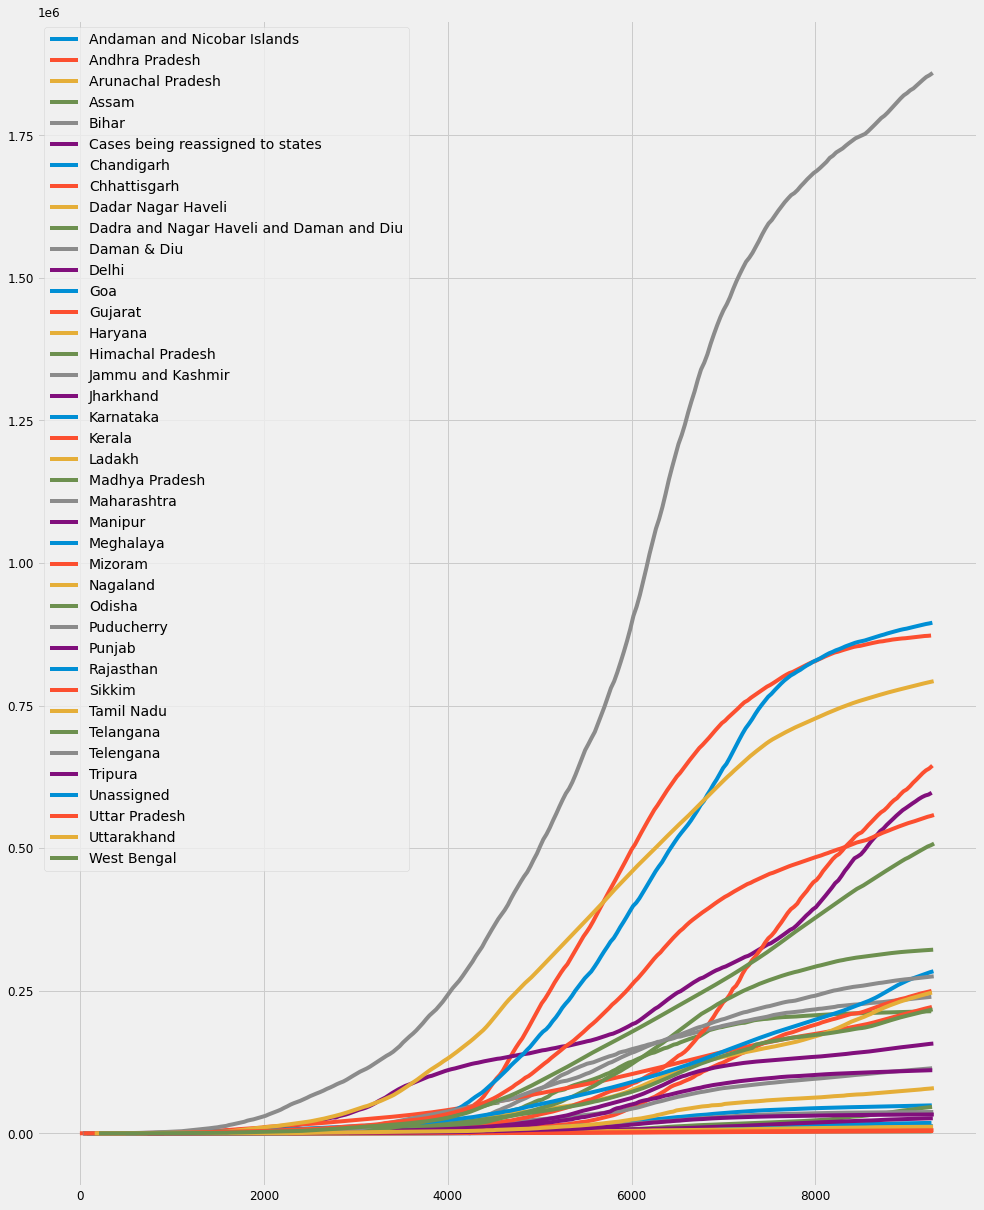

In [15]:
plt.figure(figsize=(15,20))
df.groupby('State/UnionTerritory')['Confirmed'].plot()
plt.legend()

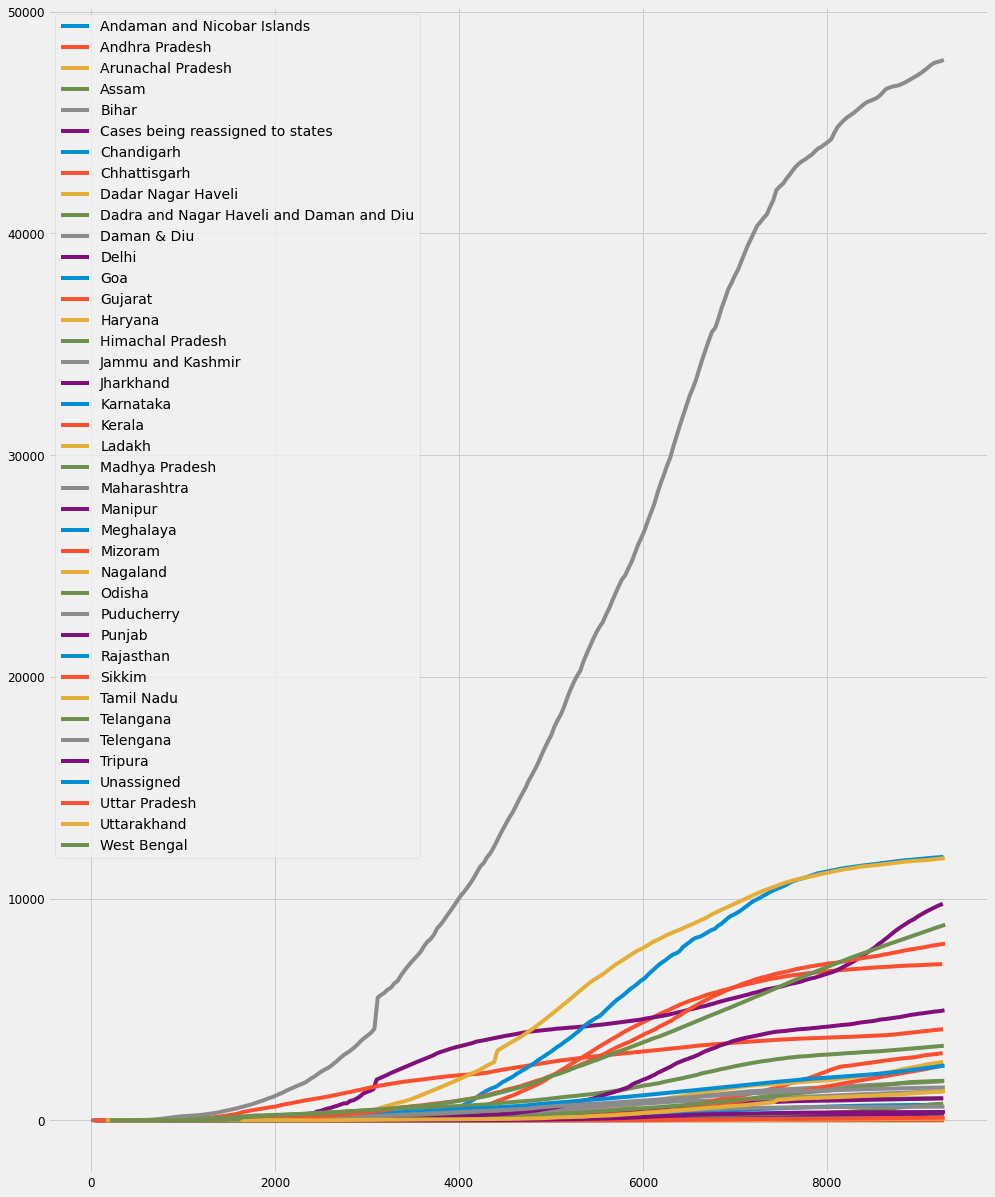

In [16]:
plt.figure(figsize=(15,20))
df.groupby('State/UnionTerritory')['Deaths'].plot()
plt.legend()

In [17]:
l = df.groupby('State/UnionTerritory')
current = l.last()    # finding the current value of Confirmed cases

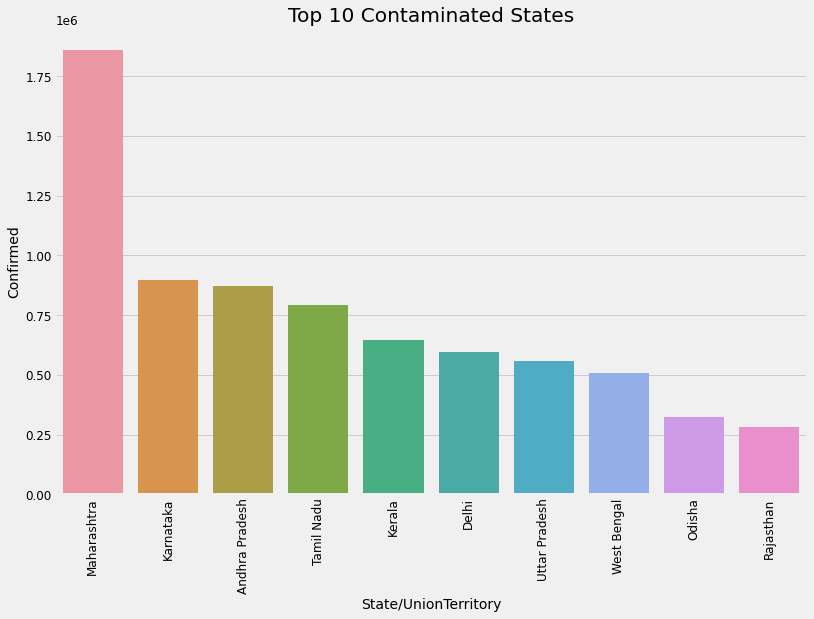

In [18]:
plt.figure(figsize=(12, 8))
plt.title('Top 10 Contaminated States')
current = current.sort_values("Confirmed", ascending=False)[:10]
sns.barplot(x=current.index, y=current.Confirmed).set_xticklabels(labels=current.index, rotation=90)
plt.show()

In [19]:
print(df['Date'].min(), df['Date'].max())

2020-01-30 00:00:00 2020-12-09 00:00:00


**TIME SERIES ANALYSIS OF UTTAR PRADESH (MY STATE)**

In [20]:
df_up = df.loc[df['State/UnionTerritory'] == 'Uttar Pradesh']
df_up.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
39,40,2020-03-04,6:00 PM,Uttar Pradesh,6,0,0,0,6
50,51,2020-03-05,6:00 PM,Uttar Pradesh,7,0,0,0,7
55,56,2020-03-06,6:00 PM,Uttar Pradesh,7,0,0,0,7
58,59,2020-03-07,6:00 PM,Uttar Pradesh,7,0,0,0,7
72,73,2020-03-08,6:00 PM,Uttar Pradesh,7,0,0,0,7


In [21]:
# finding the null values
df_up.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [22]:
df_up.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [23]:
# dropping unnecessary columns for univariate analysis
cols = ['Sno', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths']
df_up.drop(cols, axis=1, inplace=True)
df_up = df_up.sort_values('Date')
df_up.head()

,Date,Confirmed
39,2020-03-04,6
50,2020-03-05,7
55,2020-03-06,7
58,2020-03-07,7
72,2020-03-08,7


In [24]:
# Setting date as the index of the data
df_up.set_index('Date', inplace=True)
df_up.head()

,Confirmed
Date,
2020-03-04,6
2020-03-05,7
2020-03-06,7
2020-03-07,7
2020-03-08,7


In [25]:
# converting date variable as date_time
df_up.index = pd.to_datetime(df_up.index)

In [27]:
df_up.head()

,Confirmed
Date,
2020-03-04,6
2020-03-05,7
2020-03-06,7
2020-03-07,7
2020-03-08,7


In [28]:
df_up.isnull().sum()

Confirmed    0
dtype: int64

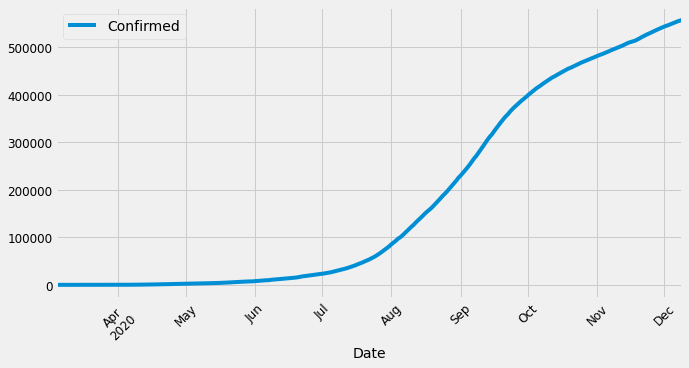

In [29]:
# Plotting the data against Date
df_up.plot(rot = 45, figsize=(10, 5))
plt.show()

***The above graph shows Trend and Seasonality in the data.***

### **Decomposition Plot**
1. *Original data*
2. *Trend in the data*
3. *Seasonality*
4. *Residual*

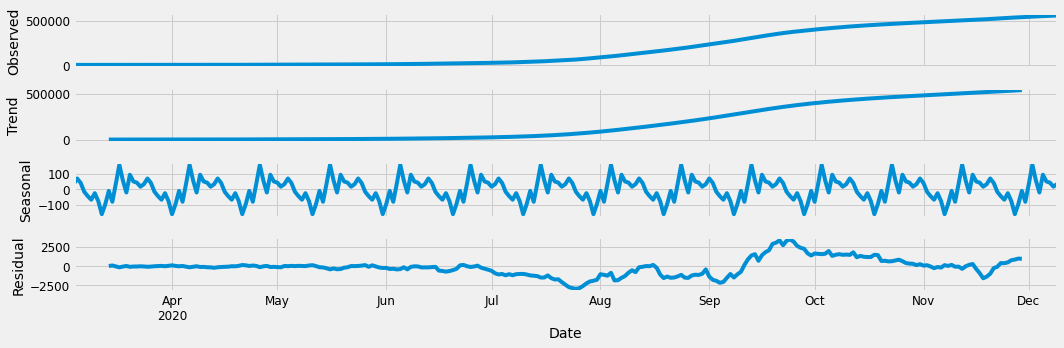

In [30]:
#importing relevant libraries
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
decomposition = sm.tsa.seasonal_decompose(df_up, freq = 20, model = 'additive')
fig = decomposition.plot()
plt.show()

In [31]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 0) for x in list(itertools.product(p, d, q))]
print(pdq)
print(seasonal_pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 0), (0, 0, 1, 0), (0, 1, 0, 0), (0, 1, 1, 0), (1, 0, 0, 0), (1, 0, 1, 0), (1, 1, 0, 0), (1, 1, 1, 0)]


#### **MODELLING THE DATA**

In [32]:
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      model = sm.tsa.statespace.SARIMAX(df_up,
                                      order=param,
                                      seasonal_order=param_seasonal,
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
      results = model.fit()
      print('ARIMA{}*{} - AIC:{:.2f}'.format(param, param_seasonal, results.aic))
    except:
      continue

ARIMA(0, 0, 0)*(0, 0, 0, 0) - AIC:7803.57
ARIMA(0, 0, 0)*(0, 0, 1, 0) - AIC:8117.42
ARIMA(0, 0, 0)*(1, 0, 0, 0) - AIC:5036.87
ARIMA(0, 0, 0)*(1, 0, 1, 0) - AIC:4837.77
ARIMA(0, 0, 1)*(0, 0, 0, 0) - AIC:8117.42
ARIMA(0, 0, 1)*(0, 0, 1, 0) - AIC:7495.83
ARIMA(0, 0, 1)*(1, 0, 0, 0) - AIC:7503.71
ARIMA(0, 0, 1)*(1, 0, 1, 0) - AIC:7478.84
ARIMA(0, 1, 0)*(0, 0, 0, 0) - AIC:5227.52
ARIMA(0, 1, 0)*(0, 0, 1, 0) - AIC:4887.18
ARIMA(0, 1, 0)*(1, 0, 0, 0) - AIC:4091.48
ARIMA(0, 1, 0)*(1, 0, 1, 0) - AIC:4014.06
ARIMA(0, 1, 1)*(0, 0, 0, 0) - AIC:4887.18
ARIMA(0, 1, 1)*(0, 0, 1, 0) - AIC:4733.36
ARIMA(0, 1, 1)*(1, 0, 0, 0) - AIC:4014.06
ARIMA(0, 1, 1)*(1, 0, 1, 0) - AIC:4000.22
ARIMA(1, 0, 0)*(0, 0, 0, 0) - AIC:5036.87
ARIMA(1, 0, 0)*(0, 0, 1, 0) - AIC:5368.09
ARIMA(1, 0, 0)*(1, 0, 0, 0) - AIC:4093.48
ARIMA(1, 0, 0)*(1, 0, 1, 0) - AIC:4029.63
ARIMA(1, 0, 1)*(0, 0, 0, 0) - AIC:4837.77
ARIMA(1, 0, 1)*(0, 0, 1, 0) - AIC:4848.43
ARIMA(1, 0, 1)*(1, 0, 0, 0) - AIC:4029.63
ARIMA(1, 0, 1)*(1, 0, 1, 0) - AIC:

####***Lowest AIC gives the best parameters***
parameters = (1, 1, 1)*(1, 0, 1, 0),  AIC : 3985.38

In [33]:
#modelling with the best parameters
model = sm.tsa.statespace.SARIMAX(df_up, order=(1, 1, 1),
                                  seasonal_order=(1, 0, 1, 0),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit()

## **Prediction**

In [34]:
pred = results.predict(start=pd.to_datetime('2020-07-01'), dynamic=False)
pred.head()

2020-07-01    23492.446784
2020-07-02    24157.630846
2020-07-03    24680.095969
2020-07-04    25506.921907
2020-07-05    26602.589324
Freq: D, dtype: float64

**Plot on the training data to check how well our model is predicting.**

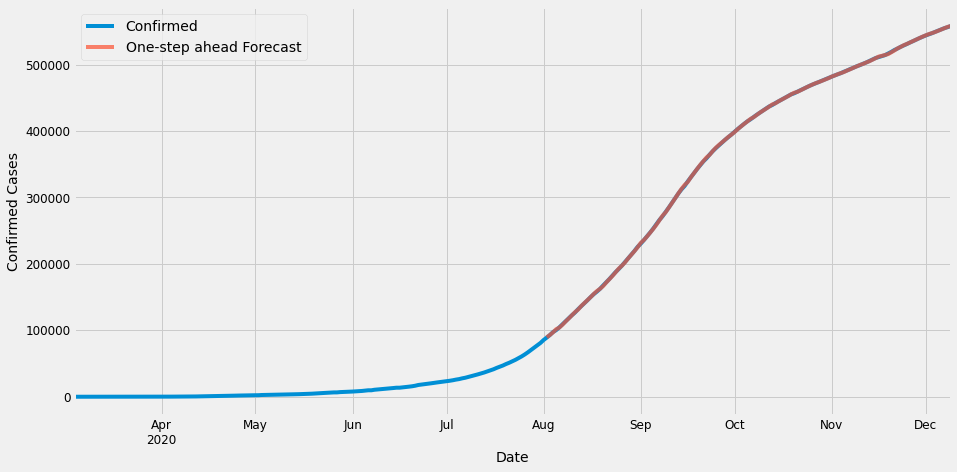

In [52]:
pred = results.get_prediction(start=pd.to_datetime('2020-08-02'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_up['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
plt.legend()
plt.show()

**Graph showing predicted trends for the next 50 steps.**

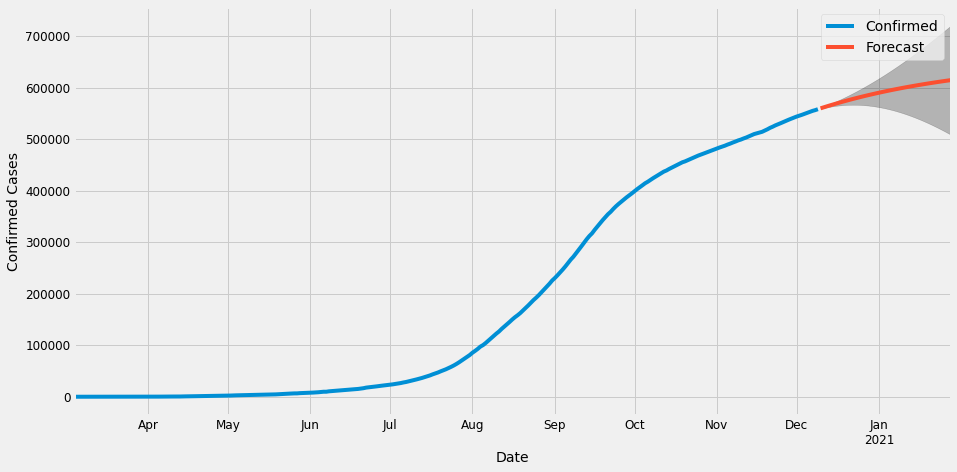

In [54]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = df_up.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')
plt.legend()
plt.show()